# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 30.96, 即時現金賣出: 31.63


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [2]:
'''

  Your code here
  
'''
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')
for item in soup.find('table').find('tbody').find_all('tr'):
    print (str.strip(item.select('.print_show')[0].text))
    print ("即時現金買入: %s, 即時現金賣出: %s" % (item.select('.rate-content-cash')[0].text, item.select('.rate-content-cash')[1].text))

美金 (USD)
即時現金買入: 29.66, 即時現金賣出: 30.33
港幣 (HKD)
即時現金買入: 3.714, 即時現金賣出: 3.918
英鎊 (GBP)
即時現金買入: 37.59, 即時現金賣出: 39.71
澳幣 (AUD)
即時現金買入: 19.22, 即時現金賣出: 20
加拿大幣 (CAD)
即時現金買入: 21.45, 即時現金賣出: 22.36
新加坡幣 (SGD)
即時現金買入: 21.04, 即時現金賣出: 21.95
瑞士法郎 (CHF)
即時現金買入: 31.33, 即時現金賣出: 32.53
日圓 (JPY)
即時現金買入: 0.277, 即時現金賣出: 0.2898
南非幣 (ZAR)
即時現金買入: -, 即時現金賣出: -
瑞典幣 (SEK)
即時現金買入: 2.79, 即時現金賣出: 3.31
紐元 (NZD)
即時現金買入: 18.5, 即時現金賣出: 19.35
泰幣 (THB)
即時現金買入: 0.828, 即時現金賣出: 1.018
菲國比索 (PHP)
即時現金買入: 0.5213, 即時現金賣出: 0.6543
印尼幣 (IDR)
即時現金買入: 0.00173, 即時現金賣出: 0.00243
歐元 (EUR)
即時現金買入: 33.24, 即時現金賣出: 34.58
韓元 (KRW)
即時現金買入: 0.02344, 即時現金賣出: 0.02734
越南盾 (VND)
即時現金買入: 0.00092, 即時現金賣出: 0.00142
馬來幣 (MYR)
即時現金買入: 5.982, 即時現金賣出: 7.607
人民幣 (CNY)
即時現金買入: 4.223, 即時現金賣出: 4.385


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

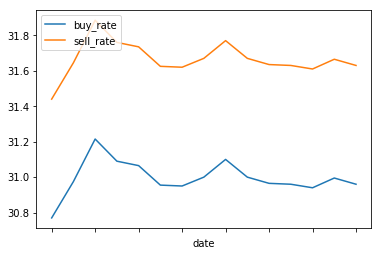

In [4]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金（USD）


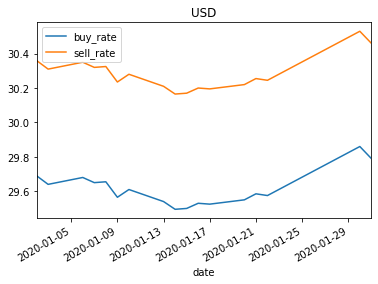

港幣（HKD）


<Figure size 432x288 with 0 Axes>

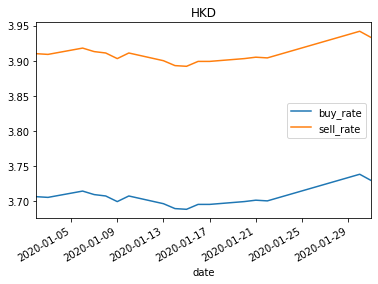

英鎊（GBP）


<Figure size 432x288 with 0 Axes>

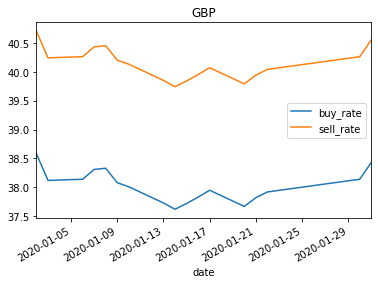

澳幣（AUD）


<Figure size 432x288 with 0 Axes>

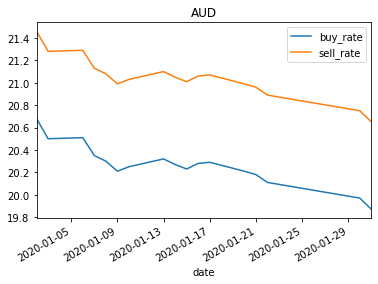

加拿大幣（CAD）


<Figure size 432x288 with 0 Axes>

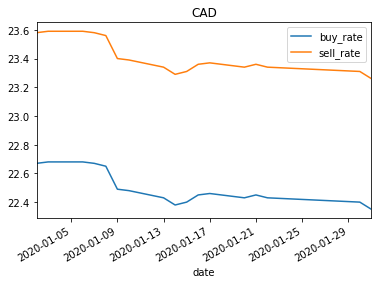

新加坡幣（SGD）


<Figure size 432x288 with 0 Axes>

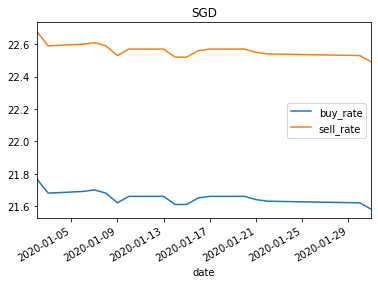

瑞士法郎（CHF）


<Figure size 432x288 with 0 Axes>

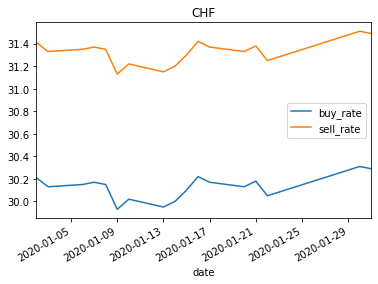

日圓（JPY）


<Figure size 432x288 with 0 Axes>

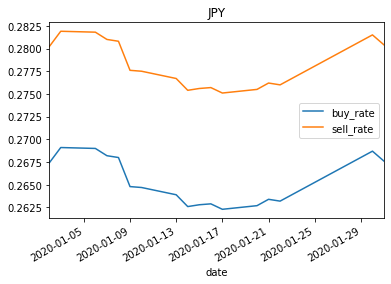

南非幣（ZAR）


<Figure size 432x288 with 0 Axes>

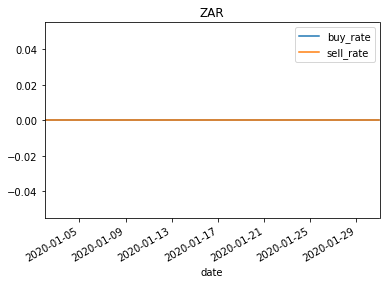

瑞典幣（SEK）


<Figure size 432x288 with 0 Axes>

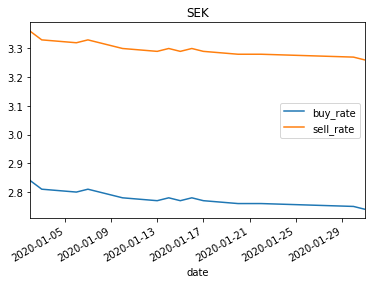

紐元（NZD）


<Figure size 432x288 with 0 Axes>

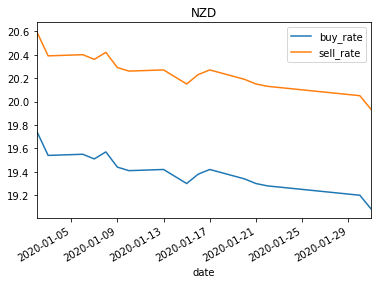

泰幣（THB）


<Figure size 432x288 with 0 Axes>

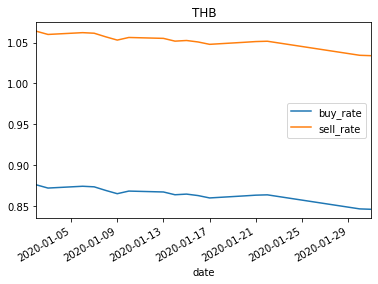

菲國比索（PHP）


<Figure size 432x288 with 0 Axes>

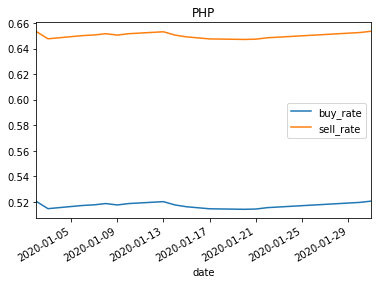

印尼幣（IDR）


<Figure size 432x288 with 0 Axes>

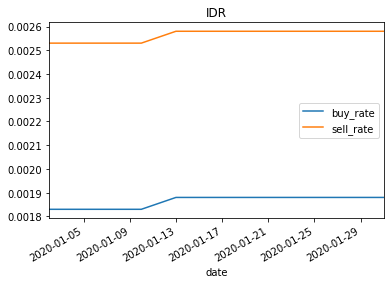

歐元（EUR）


<Figure size 432x288 with 0 Axes>

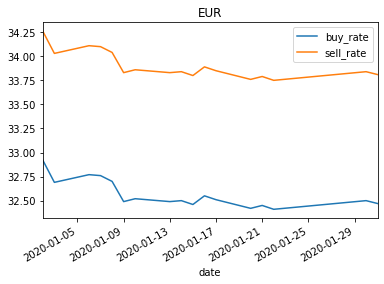

韓元（KRW）


<Figure size 432x288 with 0 Axes>

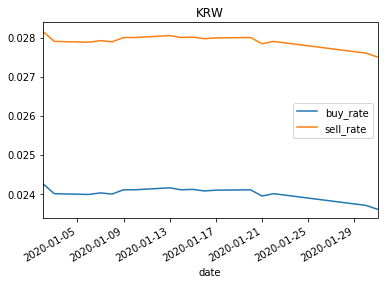

越南盾（VND）


<Figure size 432x288 with 0 Axes>

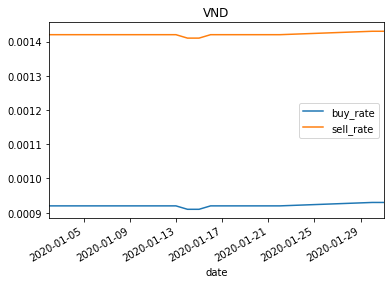

馬來幣（MYR）


<Figure size 432x288 with 0 Axes>

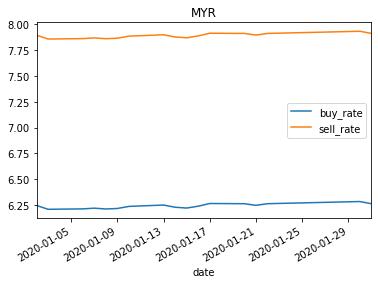

人民幣（CNY）


<Figure size 432x288 with 0 Axes>

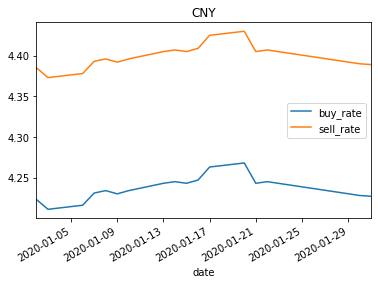

<Figure size 432x288 with 0 Axes>

In [12]:
'''

  Your code here

'''
url = 'https://rate.bot.com.tw/xrt/history/USD'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')

currencies = [(ele['value'], ele.text) for ele in soup.select('.input-medium')[0].find_all('option')]

DownLoadUrl = 'https://rate.bot.com.tw/xrt/quote/2020-01/{currency}'
data = []
for currency in currencies:
    res = requests.get(DownLoadUrl.format(currency=currency[0]))
    soup = BeautifulSoup(res.text, 'lxml')
    for item in soup.find('table').find('tbody').find_all('tr'):
        data.append({'date': datetime.strptime(item.a.text, '%Y/%m/%d'),
                     'currency': currency[1],
                     'buy_rate': float(item.select('.rate-content-cash')[0].text), 
                     'sell_rate': float(item.select('.rate-content-cash')[1].text)})

df = pd.DataFrame(data)
for currency in currencies:
    print (currency[1])
    temp = df[df['currency'] == currency[1]]
    temp = temp.set_index('date')  # 指定日期欄位為datafram的index
    temp = temp.sort_index(ascending=True)
    temp[['buy_rate','sell_rate']].plot()
    plt.title(currency[0])
    plt.show()
    plt.clf()